# *BEHAVIOURS--2*

#  **EMOTIONAL BEHAVIOURS**





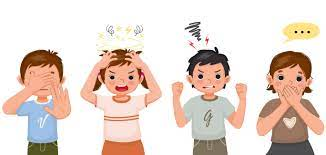



Emotional behavior refers to the way individuals express their feelings, moods, and emotions through actions, facial expressions, and gestures. It encompasses a wide range of responses, from happiness and excitement to sadness, anger, fear, and more. Emotional behavior is influenced by various factors, including genetics, environment, upbringing, and personal experiences. People often display emotional behavior in response to different situations and stimuli, and it plays a significant role in social interactions and communication. Understanding and managing emotional behavior is crucial for maintaining healthy relationships and overall well-being.

In [ ]:
#Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from tensorflow.keras import layers,models


In [ ]:
!unzip '/content/Micro_Expressions.zip'

Streaming output truncated to the last 5000 lines.
  inflating: Micro_Expressions/test/anger/anger98.jpg  
  inflating: Micro_Expressions/test/anger/anger99.jpg  
   creating: Micro_Expressions/test/happiness/
  inflating: Micro_Expressions/test/happiness/happiness1.jpg  
  inflating: Micro_Expressions/test/happiness/happiness10.jpg  
  inflating: Micro_Expressions/test/happiness/happiness100.jpg  
  inflating: Micro_Expressions/test/happiness/happiness101.jpg  
  inflating: Micro_Expressions/test/happiness/happiness102.jpg  
  inflating: Micro_Expressions/test/happiness/happiness103.jpg  
  inflating: Micro_Expressions/test/happiness/happiness104.jpg  
  inflating: Micro_Expressions/test/happiness/happiness105.jpg  
  inflating: Micro_Expressions/test/happiness/happiness106.jpg  
  inflating: Micro_Expressions/test/happiness/happiness107.jpg  
  inflating: Micro_Expressions/test/happiness/happiness108.jpg  
  inflating: Micro_Expressions/test/happiness/happiness109.jpg  
  inflating: 

In [ ]:
train_data_dir = '/content/Micro_Expressions/train'
validation_data_dir = '/content/Micro_Expressions/test'
test_data_dir = '/content/Micro_Expressions/test'
img_width, img_height =80,80
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)


In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(80,80),
    batch_size=batch_size,
    class_mode='categorical')

Found 4182 images belonging to 3 classes.


In [ ]:
len(train_generator)

131

In [ ]:
validation_generator = train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(80,80),
    batch_size=batch_size,
    class_mode='categorical')


Found 1160 images belonging to 3 classes.


In [ ]:
len(validation_generator)

37

# MODEL CREATION

In [ ]:
#Define CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(80,80,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())

model.add(layers.Dense(2048, activation='relu'))
model.add(layers.Dropout(0.75))

model.add(layers.Dense(3, activation='softmax'))

In [ ]:
epochs = 10


In [ ]:
#Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.0001),
              metrics=['accuracy'])


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)


Epoch 1/10
130/130 [==============================] - 15s 102ms/step - loss: 1.0714 - accuracy: 0.4137 - val_loss: 1.0467 - val_accuracy: 0.5017
Epoch 2/10
130/130 [==============================] - 13s 99ms/step - loss: 0.9172 - accuracy: 0.5636 - val_loss: 0.8135 - val_accuracy: 0.6528
Epoch 3/10
130/130 [==============================] - 13s 102ms/step - loss: 0.8209 - accuracy: 0.6248 - val_loss: 0.8293 - val_accuracy: 0.6215
Epoch 4/10
130/130 [==============================] - 14s 108ms/step - loss: 0.7406 - accuracy: 0.6761 - val_loss: 0.6416 - val_accuracy: 0.7144
Epoch 5/10
130/130 [==============================] - 13s 101ms/step - loss: 0.6682 - accuracy: 0.7060 - val_loss: 0.5913 - val_accuracy: 0.7543
Epoch 6/10
130/130 [==============================] - 13s 101ms/step - loss: 0.6064 - accuracy: 0.7410 - val_loss: 0.5661 - val_accuracy: 0.7674
Epoch 7/10
130/130 [==============================] - 13s 100ms/step - loss: 0.5925 - accuracy: 0.7513 - val_loss: 0.5641 - val_acc

# MODEL TEST ON TEST DATA

In [ ]:

test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(80,80),
    batch_size=1,
    class_mode='categorical',
    shuffle=False)


Found 1160 images belonging to 3 classes.


In [ ]:
import numpy as np
predictions = model.predict(test_generator, steps=test_generator.samples, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)


1160/1160 [==============================] - 5s 4ms/step


In [ ]:
predicted_classes

array([0, 0, 0, ..., 2, 2, 0])

In [ ]:
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())


In [ ]:
true_classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

# CLASSIFICATION REPORT

In [ ]:
# Print classification report and confusion matrix
print(classification_report(true_classes, predicted_classes, target_names=class_labels))
print(confusion_matrix(true_classes, predicted_classes))


              precision    recall  f1-score   support

       anger       0.80      0.83      0.81       350
   happiness       0.93      0.85      0.89       480
     sadness       0.76      0.82      0.79       330

    accuracy                           0.84      1160
   macro avg       0.83      0.83      0.83      1160
weighted avg       0.84      0.84      0.84      1160

[[291  16  43]
 [ 31 408  41]
 [ 44  16 270]]


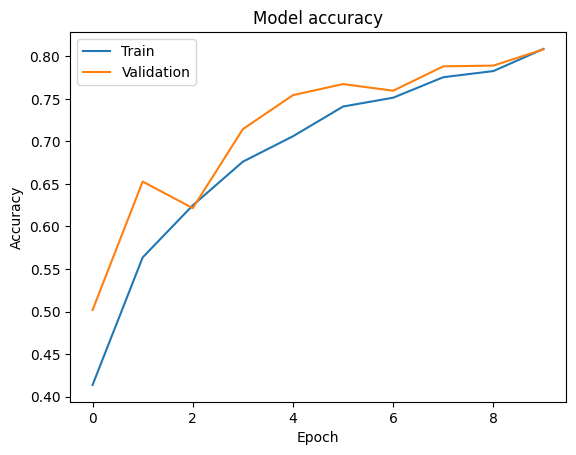

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

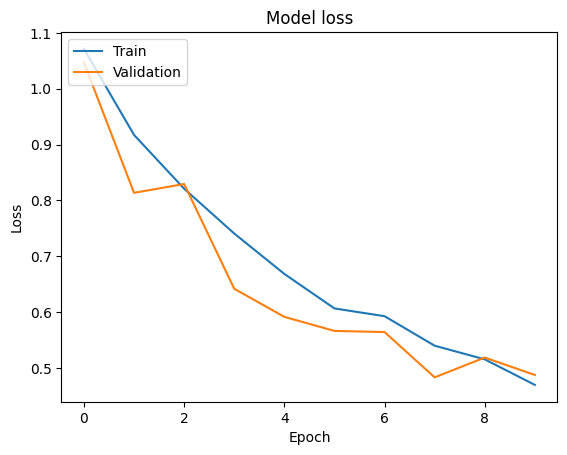

In [ ]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
##

## IMAGE DETECTION TEST

In [ ]:
from PIL import  Image
import numpy as np

In [ ]:
image_path1='/content/Micro_Expressions/test/anger/anger103.jpg'
image=Image.open(image_path1).resize((80,80))
image=np.asarray(image)
image=image/255.0
image=np.expand_dims(image,axis=0)

In [ ]:
predictions=model.predict(image)


1/1 [==============================] - 0s 30ms/step


In [ ]:
predicted_class_index=np.argmax(predictions)

In [ ]:
class_names=['anger','happiness','sadness']
predicted_class_name=class_names[predicted_class_index]

In [ ]:
predicted_class_name

'anger'

In [ ]:
mod=model.save('emo84%.h5')

In [ ]:
image_path2='/content/Micro_Expressions/test/happiness/happiness178.jpg'
image=Image.open(image_path2).resize((80,80))
image=np.asarray(image)
image=image/255.0
image=np.expand_dims(image,axis=0)
predictions=model.predict(image)
predicted_class_index=np.argmax(predictions)
class_names=['anger','happiness','sadness']
predicted_class_name=class_names[predicted_class_index]
predicted_class_name

1/1 [==============================] - 0s 29ms/step


'happiness'

In [ ]:
image_path3='/content/Micro_Expressions/test/sadness/sadness160.jpg'
image=Image.open(image_path3).resize((80,80))
image=np.asarray(image)
image=image/255.0
image=np.expand_dims(image,axis=0)
predictions=model.predict(image)
predicted_class_index=np.argmax(predictions)
class_names=['anger','happiness','sadness']
predicted_class_name=class_names[predicted_class_index]
predicted_class_name

1/1 [==============================] - 0s 18ms/step


'sadness'

In [ ]:
model=model.save("emo84%.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
